**<font size=5> Module Title: Artificial Intelligence </font>**

**<font size=5> Assessment Title: Individual CA2 </font>**

**<font size=4> Lecturer Name: David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

# Question 1
A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/Awa25/AI-DV_CA2/blob/main/qqimg.png?raw=true", width=500)

## (a) The graph in Fig. 1 is a visualisation of the problem.

### (i) Identify the differences between a graph and a tree
- Definition: A tree is a special type of graph. A tree is an undirected graph in which any two nodes are connected by exactly one path, and there are no cycles. A graph, in contrast, can have any number of paths connecting nodes and can include cycles.
- Nodes and Edges: In a tree, the number of edges is always one less than the number of nodes. In a generic graph, there can be any number of edges.
- Root: Trees typically have a specific node called the "root" from which hierarchical structures descend. Graphs do not have a designated root.
- Path: In a tree, there's exactly one unique path between any two nodes. In a graph, there can be multiple paths, or even none at all, between two nodes.
- Cycles: Trees cannot have cycles, whereas cycles can be present in graphs.

So Fig. 1 is a graph. It has cycles and multiple paths between nodes indicating it is not a tree, trees don't have cycles, and there are unique paths between any two nodes.

### (ii) Explain in detail how the graph is an abstraction of the problem.

The graph in Fig. 1 is an abstraction because it simplifies and represents the problem in terms of nodes and edges. Here's how:
- Nodes as Stages: Each node represents a stage or state in the puzzle, allowing the problem solver to visualize the distinct positions or configurations they might encounter.
- Edges as Transitions: The edges between nodes signify the possible transitions or actions one can take to move from one stage to another. The weights on these edges may represent costs, distances, or any measurable quantity of making that transition.
- Start and End: The starting point (A) and the solution (S) are clearly marked, giving a clear directionality to the problem.
- Multiple Routes: The graph highlights that there are multiple paths to reach from the start to the solution. This mirrors real-world problems where there might be more than one solution or approach.
- Abstracting Complexity: The actual intricacies, rules, or details of the puzzle might be complex. However, the graph represents them merely as paths and junctions, making it easier to analyze and solve.

### (iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1.
- Clarity: Visual representations provide a clear picture of the problem, helping in better understanding and interpretation.
- Identifying Possibilities: By looking at the graph, one can immediately see possible routes and paths.
- Problem Solving: Visuals can assist in employing algorithms or heuristics to find solutions.
- Comparing Routes: By visualizing, it becomes easier to compare different routes in terms of their lengths or costs.
- Communication: Visual representations like graphs can be easily shared and discussed among teams, making collaborative problem-solving more efficient.

## (b)Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage.

In [2]:
# Import necessary libraries
import heapq  # Import the heapq module for heap-based data structures
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs
import networkx as nx  # Import NetworkX, a library for working with networks and graphs
import timeit         # Import the timeit library for measuring code execution time.

In [3]:
# Define the graph as a list of tuples with the given data
data = [
    ("A", "B", 1), ("A", "C", 5), ("A", "H", 2),
    ("B", "A", 1), ("B", "C", 2), ("B", "D", 4),
    ("C", "A", 5), ("C", "B", 2), ("C", "G", 1),
    ("D", "B", 4), ("D", "E", 4), ("D", "F", 7), ("D", "L", 7),
    ("E", "D", 4), ("E", "F", 3), ("E", "W", 6),
    ("F", "D", 7), ("F", "E", 3), ("F", "G", 2),
    ("G", "C", 1), ("G", "F", 2), ("G", "L", 3),
    ("H", "A", 2), ("H", "K", 5), ("H", "J", 9),
    ("J", "H", 9), ("J", "N", 6), ("J", "K", 3),
    ("K", "H", 5), ("K", "J", 3), ("K", "L", 5),
    ("L", "K", 5), ("L", "G", 3), ("L", "D", 7), ("L", "N", 3), ("L", "M", 4), ("L", "W", 8), ("L", "V", 10),
    ("M", "L", 4), ("M", "P", 2), ("M", "Q", 10),
    ("N", "J", 6), ("N", "L", 3), ("N", "P", 4), ("N", "S", 7),
    ("P", "N", 4), ("P", "M", 2), ("P", "R", 5),
    ("Q", "M", 10), ("Q", "W", 4), ("Q", "S", 8),
    ("R", "P", 5), ("R", "T", 3), ("R", "S", 4),
    ("S", "Q", 8), ("S", "R", 4), ("S", "N", 7), ("S", "U", 2), ("S", "V", 6), ("S", "T", 4),
    ("T", "R", 3), ("T", "S", 4), ("T", "U", 1),
    ("U", "T", 1), ("U", "S", 2), ("U", "V", 3),
    ("V", "U", 3), ("V", "S", 6), ("V", "L", 10),
    ("W", "V", 5), ("W", "L", 8), ("W", "Q", 4), ("W", "E", 6)
]

# Initialize an empty dictionary to store the graph
graph = {}

# Iterate over the list of tuples and populate the graph dictionary
for node1, node2, cost in data:
    if node1 not in graph:
        graph[node1] = []
    graph[node1].append((node2, cost))

# Display the graph data
graph

{'A': [('B', 1), ('C', 5), ('H', 2)],
 'B': [('A', 1), ('C', 2), ('D', 4)],
 'C': [('A', 5), ('B', 2), ('G', 1)],
 'D': [('B', 4), ('E', 4), ('F', 7), ('L', 7)],
 'E': [('D', 4), ('F', 3), ('W', 6)],
 'F': [('D', 7), ('E', 3), ('G', 2)],
 'G': [('C', 1), ('F', 2), ('L', 3)],
 'H': [('A', 2), ('K', 5), ('J', 9)],
 'J': [('H', 9), ('N', 6), ('K', 3)],
 'K': [('H', 5), ('J', 3), ('L', 5)],
 'L': [('K', 5), ('G', 3), ('D', 7), ('N', 3), ('M', 4), ('W', 8), ('V', 10)],
 'M': [('L', 4), ('P', 2), ('Q', 10)],
 'N': [('J', 6), ('L', 3), ('P', 4), ('S', 7)],
 'P': [('N', 4), ('M', 2), ('R', 5)],
 'Q': [('M', 10), ('W', 4), ('S', 8)],
 'R': [('P', 5), ('T', 3), ('S', 4)],
 'S': [('Q', 8), ('R', 4), ('N', 7), ('U', 2), ('V', 6), ('T', 4)],
 'T': [('R', 3), ('S', 4), ('U', 1)],
 'U': [('T', 1), ('S', 2), ('V', 3)],
 'V': [('U', 3), ('S', 6), ('L', 10)],
 'W': [('V', 5), ('L', 8), ('Q', 4), ('E', 6)]}

In [4]:
# Fuction to perform Dijkstra's algorithm
def dijkstra(graph, start_node):
    
    # Initialize distances and predecessors for all nodes in the graph
    distances = {node: float("inf") for node in graph}
    predecessors = {node: None for node in graph}
    
    # Set the distance from the start_node to itself as 0
    distances[start_node] = 0
    
    # Create a priority queue for nodes to be explored
    # It stores tuples of (distance, node)
    priority_queue = [(0, start_node)]
    
    # While there are nodes in the priority queue to explore
    while priority_queue:
        
        # Get the node with the shortest distance from the priority queue
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # Skip this node if it has already been processed with a shorter distance
        if current_distance > distances[current_node]:
            continue
            
        # Iterate over neighbors of the current node
        for neighbor, weight in graph[current_node]:
            
            # Calculate the total distance to the neighbor through the current node
            distance = current_distance + weight
            
            # If a shorter path to the neighbor is found, update the distance and predecessor
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                
                # Add the neighbor to the priority queue for further exploration
                heapq.heappush(priority_queue, (distance, neighbor))
                
    # Return the final distances and predecessors
    return distances, predecessors

In [5]:
# Fuction to calculate the shortest path 
def shortest_path(graph, start_node, end_node):
    
    # Find the shortest path using Dijkstra's algorithm and get distances and predecessors
    distances, predecessors = dijkstra(graph, start_node)
    
    # Reconstruct the path form end_node to start_node
    path = []
    while end_node is not None:
        path.insert(0, end_node) # Insert the current node at the beginning of the path 
        end_node = predecessors[end_node] # Move to the predecessor
        
    # Return the reconstructed path and distances
    return path, distances

# Define the starting and ending nodes for the shortest path
start_node = "A"
end_node = "S"

In [6]:
# Calculate the shortest path and distances
path, distances = shortest_path(graph, start_node, end_node)

# Display the result
path, distances[end_node]

(['A', 'B', 'C', 'G', 'L', 'N', 'S'], 17)

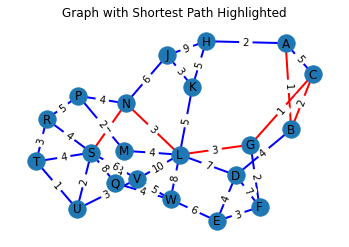

In [7]:
# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges to the graph
for node, connections in graph.items():
    for neighbor, cost in connections:
        G.add_edge(node, neighbor, weight = cost)

# Create a layout for the nodes
pos = nx.spring_layout(G)

# Calculate the shortest path
shortest_path_nodes = path  # Get this from your code
shortest_path_edges = [(shortest_path_nodes[i], shortest_path_nodes[i + 1]) for i in range(len(shortest_path_nodes) - 1)]

# Highlight the shortest path by changing edge color
edge_colors = ['b' if edge not in shortest_path_edges else 'r' for edge in G.edges()]

# Draw the nodes, edges, and labels
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color = edge_colors, width = 2)
nx.draw_networkx_labels(G, pos)

# Draw the edge labels
edge_labels = {(node, neighbor): cost for node, neighbor, cost in G.edges(data = 'weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

# Show the graph
plt.axis('off')
plt.title("Graph with Shortest Path Highlighted")
plt.show()

# Question 2
The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed.

In [8]:
G = nx.Graph()

graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'C': 2, 'D': 4},
    'C': {'G': 1},
    'D': {'E': 4, 'F': 7, 'L': 7},
    'E': {'W': 6},
    'F': {'G': 2},
    'G': {'L': 3},
    'H': {'K': 5, 'J': 9},
    'J': {'N': 6, 'K': 3},
    'K': {'L': 5},
    'L': {'N': 3, 'M': 4, 'W': 8, 'V': 10},
    'M': {'P': 2, 'Q': 10},
    'N': {'P': 4, 'S': 7},
    'P': {'R': 5},
    'Q': {'S': 8},
    'R': {'T': 3, 'S': 4},
    'S': {'U': 2, 'V': 6, 'T': 4},
    'T': {'U': 1},
    'U': {'V': 3}
}

# Iterate through the outer dictionary (source nodes).
for source, destinations in graph.items():
    
    # Iterate through the inner dictionary (destination nodes and weights).
    for destination, weight in destinations.items():
        
        # Add an edge to the graph, converting the weight to a float.
        G.add_edge(source, destination, weight=float(weight))

# Explanation

-`Graph Initialization:` The code starts by creating an empty undirected graph G using the NetworkX library. This graph will represent nodes and edges in the network.

-`Graph Data Structure:` The graph dictionary defines the structure of the graph. It's a nested dictionary where the outer keys represent source nodes (e.g., 'A', 'B', etc.), and the associated inner dictionaries represent destination nodes and their corresponding edge weights.

-`Nested Loop:` The code uses nested loops to traverse the graph dictionary:

1) The outer loop iterates through the source nodes. source represents the source node letter ('A', 'B', etc.).

2) The inner loop iterates through the inner dictionary, extracting destination (destination node letter) and weight (the weight of the edge connecting the source and destination nodes).

-`Edge Addition:` Within the inner loop, the code adds an edge to the graph G using G.add_edge(). It specifies the source and destination nodes and converts the weight to a floating-point number using float(weight) to ensure it's treated as a numeric value.c value. numeric value.

In [9]:
# Specifies the starting node in the graph as 'A'.
start_node = 'A'  

# Specifies the ending node in the graph as 'S'.
end_node = 'S' 

# Define Start and End Nodes

In the provided code, two variables are defined to specify the starting and ending nodes in a graph or network.

- `start_node = 'A'`: This variable `start_node` is set to 'A', representing the starting node in the graph. It indicates the node from which a particular operation or search will begin.

- `end_node = 'S'`: This variable `end_node` is set to 'S', representing the ending node in the graph. It indicates the destination or target node that you want to reach or find.

These variables are typically used in various graph-related operations, such as finding the shortest path between two nodes, network traversal, or any task that involves navigation or routing within a graph or network. In this specific context, 'A' is the starting point, and 'S' is the desired destination.

In [10]:
# Define a Heuristic Function

def alphabet_heuristic(node):
    # Assuming the nodes are letters, you can calculate the absolute
    # difference in their ASCII values as a heuristic.
    return abs(ord(node) - ord(end_node))

# Define a Heuristic Function

In this code snippet, a heuristic function named `alphabet_heuristic` is defined. This heuristic function is used in various graph-based algorithms, especially in pathfinding or search algorithms like A* (A-star).

- `def alphabet_heuristic(node)`: This line defines the function `alphabet_heuristic`, which takes a single argument `node`. The purpose of this function is to calculate a heuristic value for a given node.

- `# Assuming the nodes are letters...`: This comment explains the assumption that the nodes are represented as letters (e.g., 'A', 'B', 'C').

- `return abs(ord(node) - ord(end_node))`: This line calculates the heuristic value. It does so by taking the absolute difference between the ASCII values of the given `node` and the `end_node`. The `ord()` function returns the ASCII value of a character, and subtracting the ASCII values provides a simple heuristic based on the alphabetical order of nodes.

The heuristic function can be used in algorithms like A* to estimate the cost of reaching the `end_node` from a given `node`. It helps guide the search by prioritizing nodes that are likely to lead to a better path to the goal, potentially improving the efficiency of pathfinding in graphs or networks where the heuristic is admissible (never overestimates the true cost) and consistent (satisfies the triangle inequality).

In [11]:
# Implement A* Search Manually

def astar_search(graph, start, end, heuristic):
    
    open_set = []
    
    # Initialize the priority queue with the start node.
    heapq.heappush(open_set, (0, start))
    
    # Initialize a dictionary to track the path.
    came_from = {}  

    # Initialize the cost from the start node to each node as infinity.
    g_score = {node: float('inf') for node in graph.nodes}  
    
    # Set the cost from the start node to itself as 0.
    g_score[start] = 0  

    
    while open_set:
        
        # Select the node with the lowest f_score from the priority queue.
        _, current = heapq.heappop(open_set)  

        # If the current node is the end node, reconstruct and return the path.
        if current == end:  
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['weight']

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current  # Record the best path to the neighbor.
                g_score[neighbor] = tentative_g_score  # Update the cost from the start node to the neighbor.
                f_score = tentative_g_score + heuristic(neighbor)
                heapq.heappush(open_set, (f_score, neighbor))  # Add the neighbor to the priority queue.

    # If the while loop exits and no path is found, return None.
    return None

# Implement A* Search Manually

The provided code is an implementation of the A* search algorithm, a popular pathfinding algorithm used to find the shortest path between two nodes in a graph. This implementation includes the following components:

- `astar_search(graph, start, end, heuristic)`: This function takes four arguments:
  - `graph`: The graph in which the search is performed.
  - `start`: The starting node for the search.
  - `end`: The target node that the search aims to reach.
  - `heuristic`: A heuristic function that estimates the cost from a node to the goal node.

- `open_set`: A priority queue initialized with a tuple containing the current cost and the starting node. It stores nodes to be explored based on their estimated total cost (`f_score`).

- `came_from`: A dictionary that keeps track of the path by mapping each node to its predecessor on the optimal path.

- `g_score`: A dictionary initialized with a cost of infinity for each node. It keeps track of the cost from the start node to each node.

The A* search algorithm proceeds as follows:

1. The algorithm selects the node with the lowest `f_score` from the `open_set` for exploration.
2. If the selected node is the goal node (`end`), it reconstructs the path and returns it.
3. For each neighbor of the current node, it calculates a tentative `g_score` (the cost of the path from the start node to the neighbor).
4. If the tentative `g_score` is lower than the current `g_score` for the neighbor, it updates the `came_from` and `g_score` dictionaries and adds the neighbor to the `open_set` with its `f_score`.
5. The process continues until the `open_set` is empty, indicating that no path is found, in which case the function returns `None`.

This implementation efficiently explores the graph to find the shortest path using the provided heuristic to guide the search.

In [12]:
# Measure the execution time for Dijkstra's algorithm
dijkstra_time = timeit.timeit(
    lambda: nx.shortest_path(G, source=start_node, target=end_node, weight='weight'),
    number=1
)

# Measure the execution time for A* algorithm
a_star_time = timeit.timeit(
    lambda: astar_search(G, start_node, end_node, alphabet_heuristic),
    number=1
)

# Measure Execution Time for Pathfinding Algorithms

In this code, the execution time of two pathfinding algorithms, Dijkstra's algorithm and A* algorithm, is measured using the `timeit` library. The purpose is to compare the time it takes to find the shortest path from a start node to an end node in the given graph `G` using these two algorithms.

- `dijkstra_time = timeit.timeit(...)`: This line measures the execution time for Dijkstra's algorithm. It uses the `timeit` function to time the execution of the lambda function provided. The lambda function uses `nx.shortest_path` from NetworkX to find the shortest path in the graph. The `number=1` argument indicates that the timing should be done once.

- `a_star_time = timeit.timeit(...)`: This line measures the execution time for the A* algorithm. It also uses the `timeit` function to time the execution of the lambda function provided, which calls the `astar_search` function defined earlier with the `alphabet_heuristic`. Similarly, the `number=1` argument means the timing is performed once.

The resulting `dijkstra_time` and `a_star_time` variables store the execution times of Dijkstra's algorithm and A* algorithm, respectively. This allows for a performance comparison between the two algorithms in finding the shortest path in the graph.

In [13]:
# Print the results

# Print the path found by Dijkstra's algorithm and its execution time
print(f'Dijkstra\'s Path: {nx.shortest_path(G, source = start_node, target = end_node, weight = "weight")}')
print(f'Dijkstra\'s Execution Time: {dijkstra_time:.6f} seconds')

# Print the path found by A* algorithm and its execution time
print(f'A* Path: {astar_search(G, start_node, end_node, alphabet_heuristic)}')
print(f'A* Execution Time: {a_star_time:.6f} seconds')

Dijkstra's Path: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Dijkstra's Execution Time: 0.000193 seconds
A* Path: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
A* Execution Time: 0.000163 seconds


# Print the Results

The code provided prints the results of running Dijkstra's algorithm and A* algorithm to find the shortest path in the graph `G`. It displays both the path found and the execution time for each algorithm.

- `Dijkstra's Path: ...`: This line prints the path found by Dijkstra's algorithm using `nx.shortest_path`. The `weight="weight"` argument specifies that the algorithm should consider the edge weights when finding the path.

- `Dijkstra's Execution Time: ... seconds`: This line prints the execution time of Dijkstra's algorithm measured earlier and stored in the `dijkstra_time` variable.

- `A* Path: ...`: This line prints the path found by the A* algorithm using the custom `astar_search` function and the `alphabet_heuristic`.

- `A* Execution Time: ... seconds`: This line prints the execution time of the A* algorithm measured earlier and stored in the `a_star_time` variable.

The printed results provide information about the paths discovered by each algorithm and the time it took to find them. This allows for a comparison of the algorithms in terms of efficiency and the quality of the paths they produce.

# Dijkstra's Algorithm vs. A* Search Algorithm Comparison

## Shortest Path Equivalence
In this specific instance, both Dijkstra's algorithm and A* search algorithm have returned the same shortest path: `['A', 'B', 'C', 'G', 'L', 'N', 'S']`. This equivalence occurs because the graph and problem instance do not require the use of A*'s heuristic function to find the optimal path. Both algorithms systematically explore the nodes, ensuring that the path with the lowest cost is found.

## Performance Comparison
While both algorithms have performed equally well in this instance, it's important to note that this is not always the case. The primary distinction between these algorithms lies in the use of heuristics. Dijkstra's algorithm does not use heuristics and exhaustively explores all possible paths from the start node. In contrast, A* uses a heuristic to estimate the remaining cost to reach the goal, which guides the search.

## Algorithm Complexity
- **Dijkstra's Algorithm**: The time complexity of Dijkstra's algorithm is O((V + E) log V), where V is the number of vertices (nodes), and E is the number of edges in the graph. It guarantees the shortest path but can be computationally expensive, especially in large graphs.
- **A* Algorithm**: The worst-case time complexity of A* is the same as Dijkstra's. However, its performance often surpasses Dijkstra's in practice when a good heuristic is available.

## The Role of Heuristics
The efficiency of A* is closely tied to the quality of the heuristic function used. If a good heuristic is applied, A* can explore significantly fewer nodes compared to Dijkstra's. This is because the heuristic guides the search towards the most promising paths, making A* more efficient.

### Admissibility and Consistency of Heuristic
For A* to work effectively, the heuristic function should satisfy two important properties:
- **Admissibility**: The heuristic should never overestimate the cost to reach the goal. In other words, it should be an optimistic estimate. This property ensures that A* will always find the optimal path.
- **Consistency (or Monotonicity)**: The heuristic should satisfy the triangle inequality. This means that the estimated cost from the current node to the goal, through any neighbor, should not be greater than the sum of the estimated cost from the current node to the neighbor and the estimated cost from the neighbor to the goal. A consistent heuristic helps A* work more efficiently.

## Graph and Problem Factors
The choice between Dijkstra's algorithm and A* should be based on the characteristics of your specific problem and graph. Consider the following factors:
- **Heuristic Quality**: The quality of the heuristic plays a crucial role. In some cases, it may be challenging to design an effective heuristic, making Dijkstra's algorithm a safer choice.
- **Graph Size**: For very large graphs, the efficiency of A* may be more noticeable, provided a good heuristic is available.
- **Graph Structure**: The structure of the graph (e.g., dense or sparse, regular or irregular) can impact algorithm performance.

## Evaluation Considerations
When choosing between these algorithms, it's important to evaluate them based on your specific use case. Conduct performance tests, assess the quality of the heuristic, and consider the computational resources available.

## Conclusion
While Dijkstra's algorithm and A* search algorithm found the same shortest path in this specific instance, the choice between the two should be made based on the problem and graph characteristics. A* can provide significant advantages when a good heuristic is available, but Dijkstra's algorithm is a reliable choice when you have no additional information about the problem. The key to making the right choice is understanding the problem, the graph, and the quality of available heuristics.